In [11]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt 

In [ ]:
df_1 = pd.read_csv('/Users/hosammahmoud/downloads/p1.csv')
df_2 = pd.read_csv('/Users/hosammahmoud/downloads/p2.csv')
df = pd.concat([df_1, df_2]).reset_index()

#### Calculate Average Time Per Day

/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/1689185444.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['average_time'] = (
/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/1689185444.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['input_time'] = pd.to_datetime(df_['input_time'], errors='coerce')
/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/1689185444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

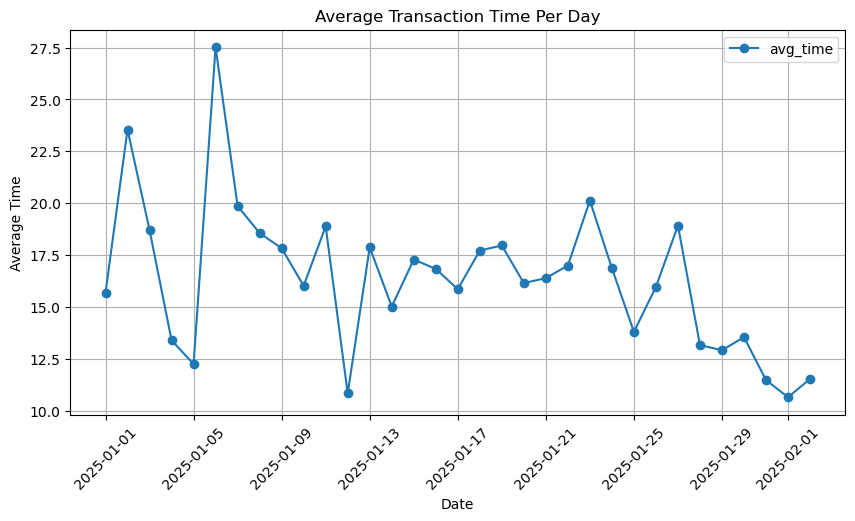

In [13]:
df_ = df.loc[~df['output_time'].apply(lambda x: isinstance(x, float))]

df_['average_time'] = (
            df_['output_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f %Z').timestamp()) - 
            df_['input_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S.%f %Z').timestamp()))


df_['input_time'] = pd.to_datetime(df_['input_time'], errors='coerce')
df_['date'] = df_['input_time'].dt.date
avg_time_per_day = df_.groupby('date')['average_time'].mean()
max_time_per_day = df_.groupby('date')['average_time'].max()
min_time_per_day = df_.groupby('date')['average_time'].min()

plt.figure(figsize=(10, 5))
plt.plot(avg_time_per_day.index, avg_time_per_day.values, marker='o', linestyle='-', label = 'avg_time')
# plt.plot(min_time_per_day.index, min_time_per_day.values, marker='o', linestyle='--', label = 'min_time')
# plt.plot(max_time_per_day.index, max_time_per_day.values, marker='o', linestyle='--', label = 'max_time')

# Formatting the chart
plt.xlabel('Date')
plt.ylabel('Average Time')
plt.title('Average Transaction Time Per Day')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.show()

#### Calculate Percentage of tx of transfering same token on different chains vs. different tokens

In [14]:
print('Percentage of tx of transfering same token: ', len(df.loc[df['output_symbol'] == df['token_symbol']])*100/len(df), '%')
print('Percentage of tx of transfering different token: ', len((df.loc[(df['output_symbol'] != df['token_symbol']) &
                                                            (df['token_symbol'].notnull()) & 
                                                            (df['output_token'].notnull())])) *100/len(df), '%')

Percentage of tx of transfering same token:  85.87344546288884 %
Percentage of tx of transfering different token:  0.4760478435544337 %


/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/3978676853.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['fee'] = df_['input_amount_usd'] - df_['output_amount_usd']
/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/3978676853.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['input_time'] = pd.to_datetime(df_['input_time'], errors='coerce')
/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/3978676853.py:7: SettingWithCopyWarning: 
A value is try

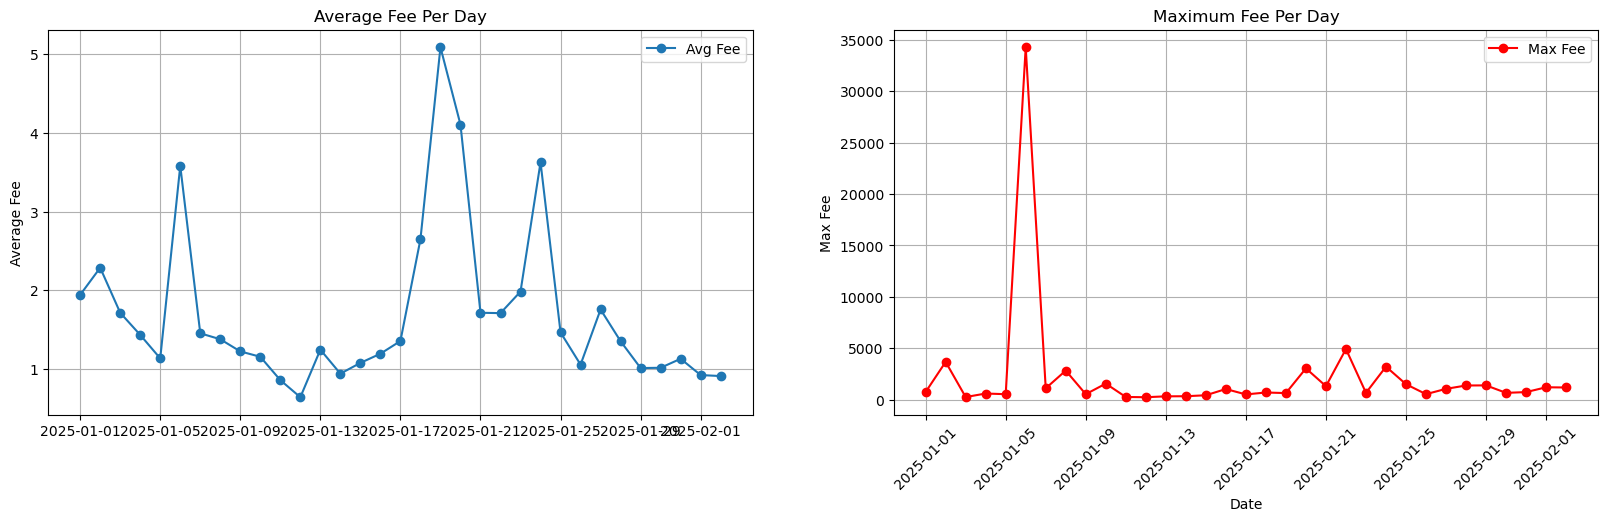

/var/folders/cj/y2g53yyx4bs9qmksf0q92ww40000gn/T/ipykernel_33571/3978676853.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['fee_pct'] =  (df_['input_amount_usd'] - df_['output_amount_usd'])/df_['input_amount_usd']


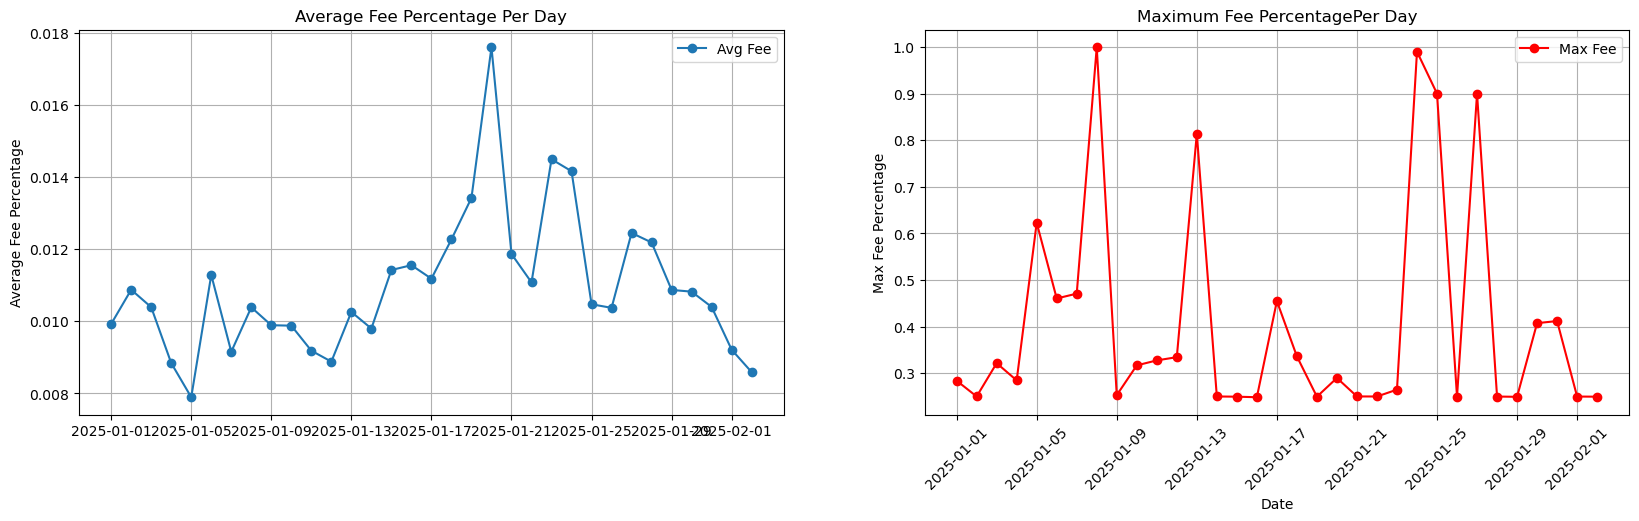

In [15]:
# FEE 

df_ = df.loc[df['output_symbol'] == df['token_symbol']] 
df_['fee'] = df_['input_amount_usd'] - df_['output_amount_usd']

df_['input_time'] = pd.to_datetime(df_['input_time'], errors='coerce')
df_['date'] = df_['input_time'].dt.date
avg_fee_per_day = df_.groupby('date')['fee'].mean()
max_fee_per_day = df_.groupby('date')['fee'].max()
min_fee_per_day = df_.groupby('date')['fee'].min()

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

ax[0].plot(avg_fee_per_day.index, avg_fee_per_day.values, marker='o', linestyle='-', label="Avg Fee")
ax[0].set_ylabel("Average Fee")
ax[0].set_title("Average Fee Per Day")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(max_fee_per_day.index, max_fee_per_day.values, marker='o', linestyle='-', color='red', label="Max Fee")
ax[1].set_ylabel("Max Fee")
ax[1].set_title("Maximum Fee Per Day")
ax[1].grid(True)
ax[1].legend()

plt.xticks(rotation=45)
plt.xlabel("Date")

plt.show()

# FEE PERCENTAGE

df_['fee_pct'] =  (df_['input_amount_usd'] - df_['output_amount_usd'])/df_['input_amount_usd']

avg_fee_per_day = df_.groupby('date')['fee_pct'].mean()
max_fee_per_day = df_.groupby('date')['fee_pct'].max()
min_fee_per_day = df_.groupby('date')['fee_pct'].min()

fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=True)

ax[0].plot(avg_fee_per_day.index, avg_fee_per_day.values, marker='o', linestyle='-', label="Avg Fee")
ax[0].set_ylabel("Average Fee Percentage")
ax[0].set_title("Average Fee Percentage Per Day")
ax[0].grid(True)
ax[0].legend()

# Plot Maximum Fees
ax[1].plot(max_fee_per_day.index, max_fee_per_day.values, marker='o', linestyle='-', color='red', label="Max Fee")
ax[1].set_ylabel("Max Fee Percentage")
ax[1].set_title("Maximum Fee PercentagePer Day")
ax[1].grid(True)
ax[1].legend()

plt.xticks(rotation=45)
plt.xlabel("Date")

plt.show()


#### Volumes per Token and Per Chain

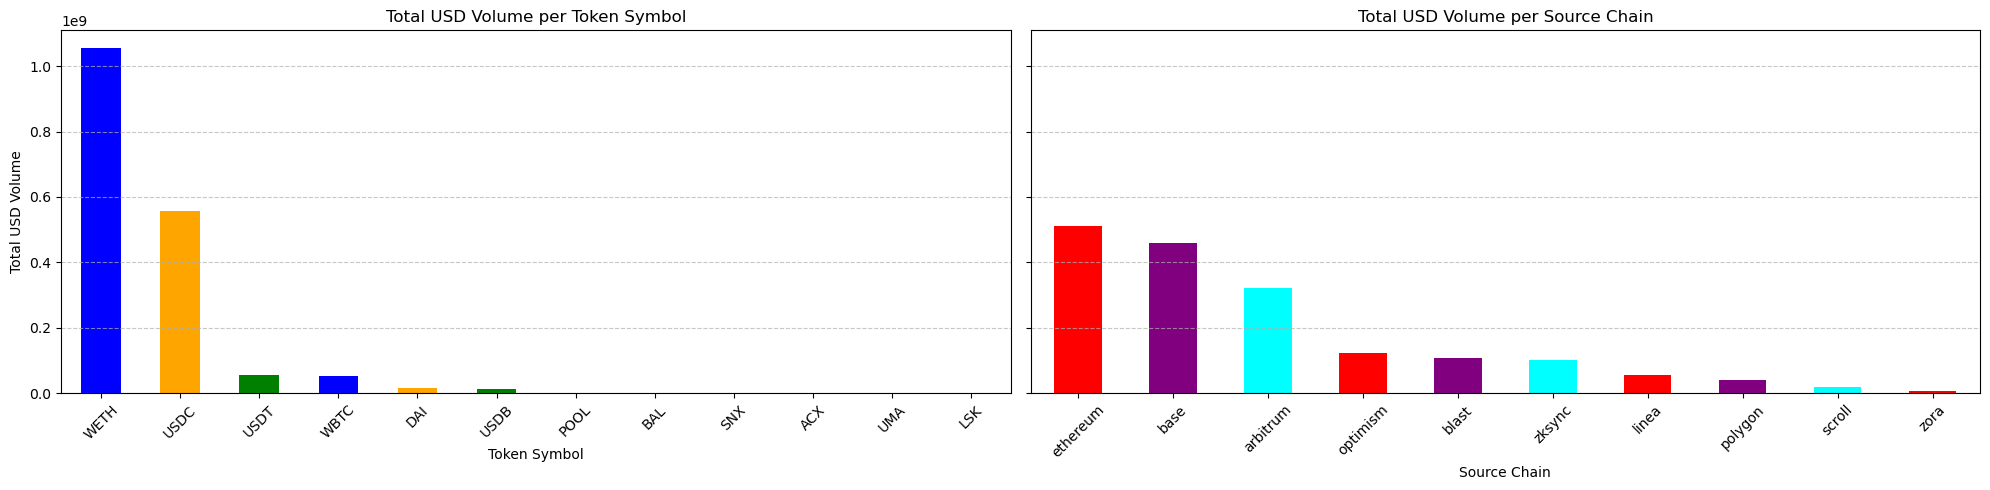

In [18]:
usd_volumes_token = df.groupby('token_symbol')['input_amount_usd'].sum().sort_values(ascending=False)
usd_volumes_chain = df.groupby('src_chain')['input_amount_usd'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

usd_volumes_token.plot(kind='bar', stacked=True, color=['blue', 'orange', 'green'], ax=axes[0])
axes[0].set_title("Total USD Volume per Token Symbol")
axes[0].set_xlabel("Token Symbol")
axes[0].set_ylabel("Total USD Volume")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

usd_volumes_chain.plot(kind='bar', stacked=True, color=['red', 'purple', 'cyan'], ax=axes[1])
axes[1].set_title("Total USD Volume per Source Chain")
axes[1].set_xlabel("Source Chain")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

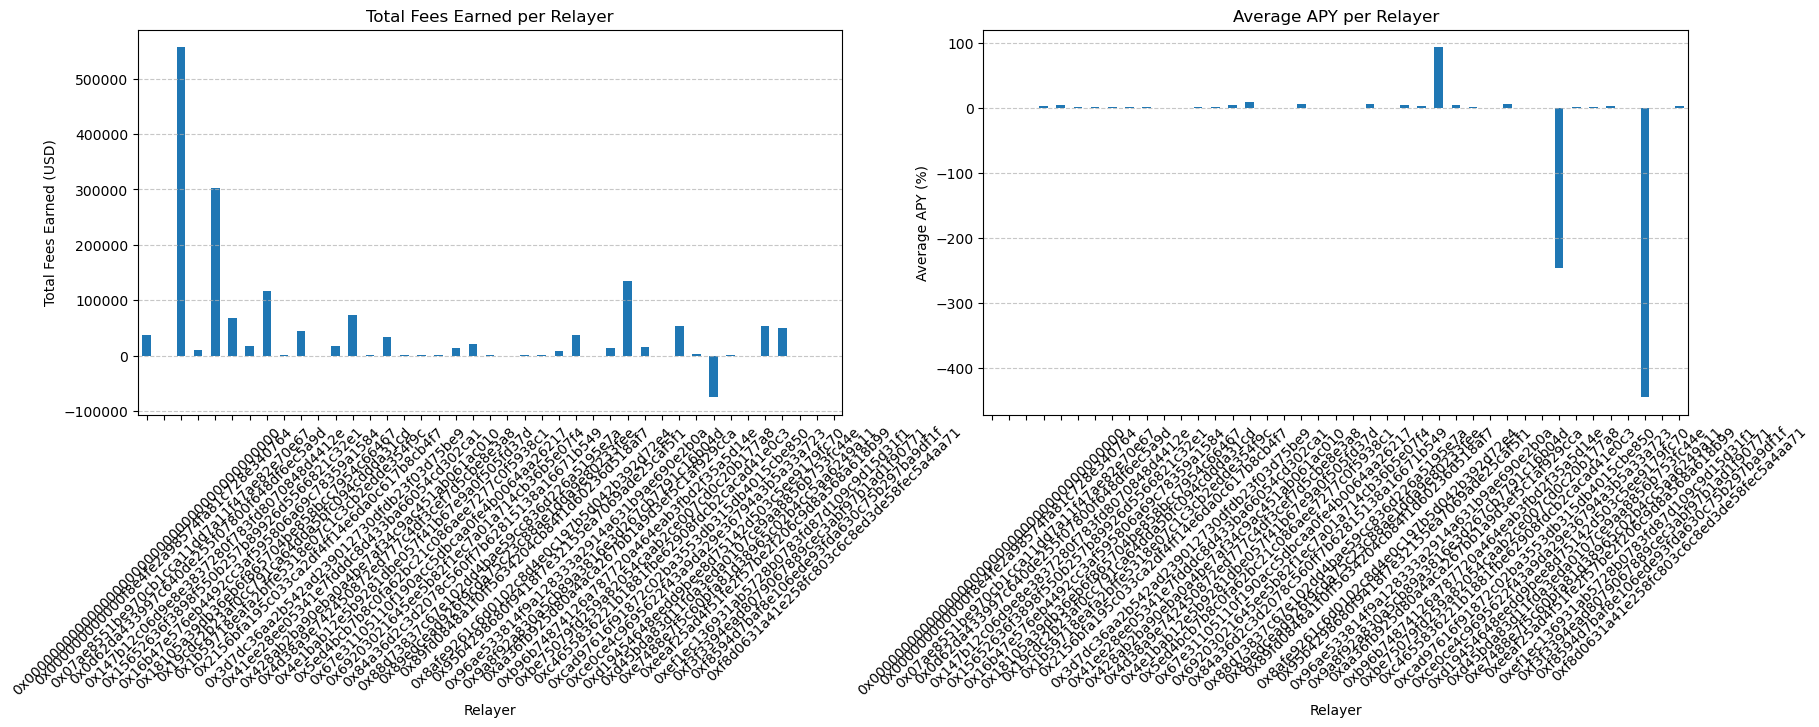

In [21]:
df['fees'] = df['input_amount_usd'] - df['output_amount_usd']
daily_fees = df.groupby('relayer')['fees'].sum()
df['apy'] = (df['fees'] * 100/ df['input_amount_usd'])  # APY = (Fees / Used Money) * 100
daily_apy = df.groupby('relayer')['apy'].mean()

fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=False)

daily_fees.plot(kind='bar', ax=axes[0])

axes[0].set_xlabel("Relayer")
axes[0].set_ylabel("Total Fees Earned (USD)")
axes[0].set_title("Total Fees Earned per Relayer")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

daily_apy.plot(kind='bar', ax=axes[1])

axes[1].set_xlabel("Relayer")
axes[1].set_ylabel("Average APY (%)")
axes[1].set_title("Average APY per Relayer")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

plt.show()
